In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sizes = [5, 10, 100, 200, 400, 600, 800, 1000]

# Дискретное распределение

## Генерация выборок выбранных случайных величин

In [ ]:
def P(x):
  t = 1/13
  return -t**x/(np.log(1-t) * x)

In [ ]:
def log_dist_model(u):
  m0 = 1
  s = 0
  while s <= u:
    s += P(m0)
    if s > u:
      return m0
    m0 += 1

In [ ]:
df_log = dict() # словарь, где ключ - объем выборки, значение - 5 выборок с логарифмическим распределением
for n in sizes:
  df_uni = np.random.uniform(size=(5, n))# 5 выборок размера n
  df_log[n] = [[log_dist_model(u) for u in df_uni[i]] for i in range(5)]

In [ ]:
df_log[10] # 5 выборок объема 10

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

## Построение эмпирической функции распределения

In [ ]:
def emp(df: list, x_lst: list): # Э.ф.р.
  return [np.sum(np.array(df) <= x) / len(df) for x in x_lst]

In [ ]:
emp(df_log[10][2], [1,2,3,4,5])

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
def tdf(x_lst):
  res = []
  for x in x_lst:
    if x < 1:
      res.append(0)
    else:
      s = 0
      for k in range(1, int(x) + 1):
        s += 1 / (k * (13**k))
      s *= 1/np.log(13/12)
      res.append(s)
  return res

In [ ]:
tdf([-10, 1, 1.5, 1.9, 2, 2.5, 3])

[0,
 0.9610254220386545,
 0.9610254220386545,
 0.9610254220386545,
 0.9979879382709105,
 0.9979879382709105,
 0.9998834519238468]

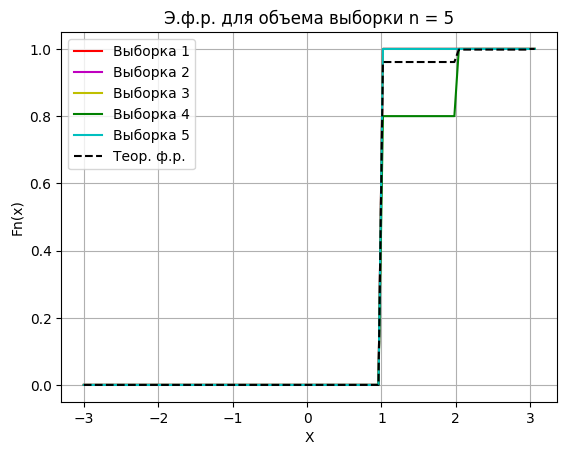

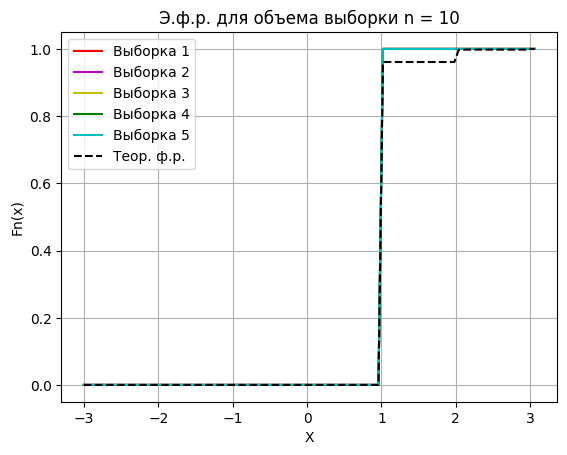

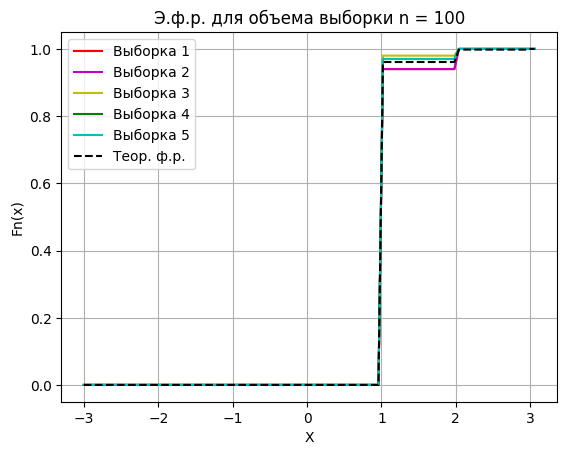

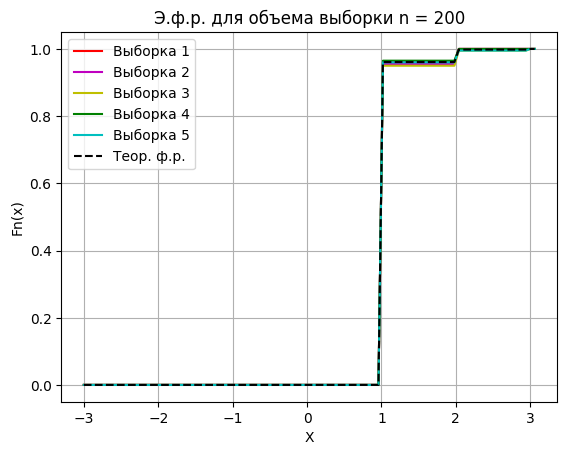

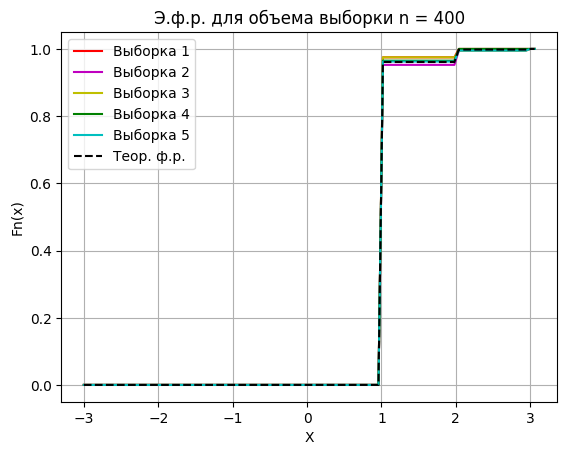

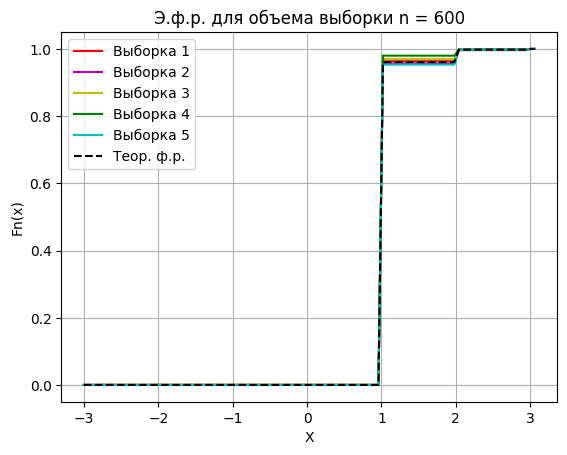

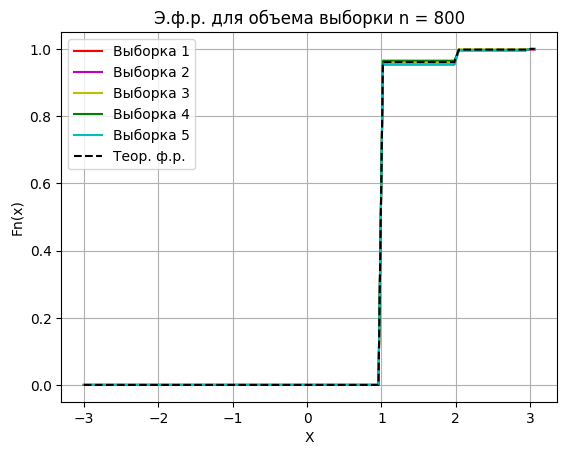

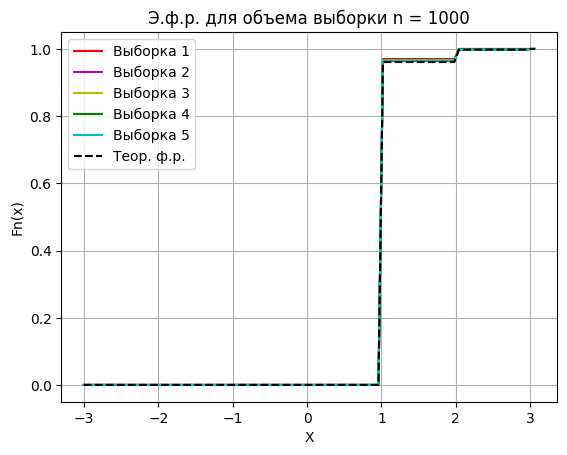

In [ ]:
for n in sizes:
  x = np.arange(-3, 3 + 2 * 3 / 100, 2 * 3 / 100)

  for i in range(5): # на одном графике отобразим э.ф.р. для 5 выборок одного объема
    plt.plot(x, emp(df_log[n][i], x), 'rmygc'[i])

  plt.plot(x, tdf(x), '--k')

  plt.legend(['Выборка ' + str(i) for i in range(1, 6)] + ['Теор. ф.р.'])

  plt.grid(True)
  plt.xlabel('X')
  plt.ylabel('Fn(x)')
  plt.title(f'Э.ф.р. для объема выборки n = {n}')
  plt.show()

### $D_{m,n}$

In [ ]:
for n in sizes:
  for m in sizes:
      for i in range(5):
        for j in range(5):
          x_lst = list(np.arange(-100, 100)) # При подсчете в э.ф.р. количества элементов <= x, мы знаем что элементы - натуральные числа (т.к. с.в. принимает такие значения)
          c = np.sqrt(n * m) / (n + m)
          differences = np.abs(np.array(emp(df_log[n][i], x_lst)) - np.array(emp(df_log[m][j], x_lst)))
          sup = np.max(differences)
          print(f'(n, m) = {n, m}' + (8 - len(str(n)) - len(str(m))) * ' ' + f' | D = {np.round(c * sup, 5)}')

(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 5)       | D = 0.1
(n, m) = (5, 5)       | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) = (5, 10)      | D = 0.0
(n, m) =

KeyboardInterrupt: ignored

## Построение гистограммы и полигона частот

In [ ]:
df_log[10][4]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
n = 10
arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
print(arr_uniq, arr_freq / n)

[1] [1.]


In [ ]:
'''arr_uniq, arr_freq = np.unique([94,92,94,95,95,96,97,98,96,96], return_counts=True)
plt.plot(arr_uniq, arr_freq, 'r', marker='o')
plt.plot(arr_uniq, [P(x) for x in arr_uniq], 'g', marker='o')
plt.grid(True)
plt.legend(['Полигон частот', 'Функция вероятности'])
plt.title('Test')
plt.show()'''

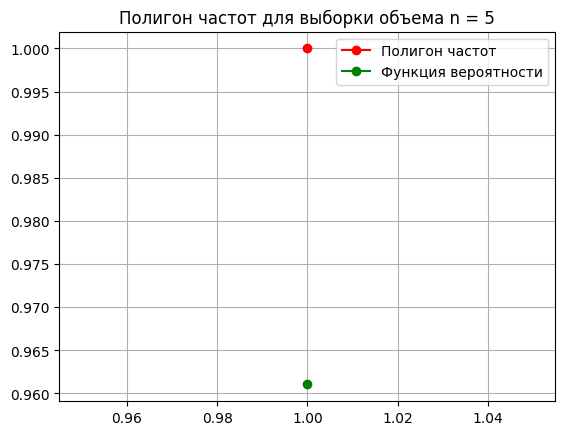

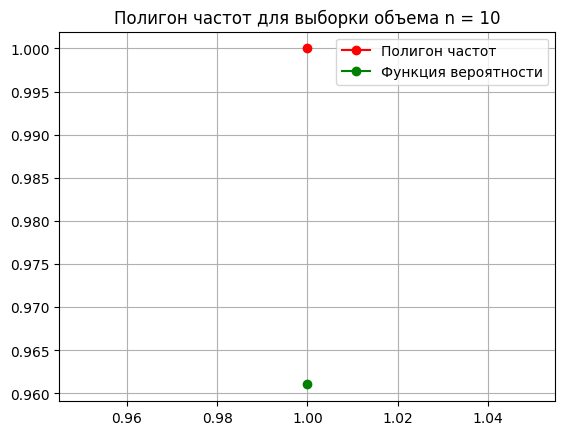

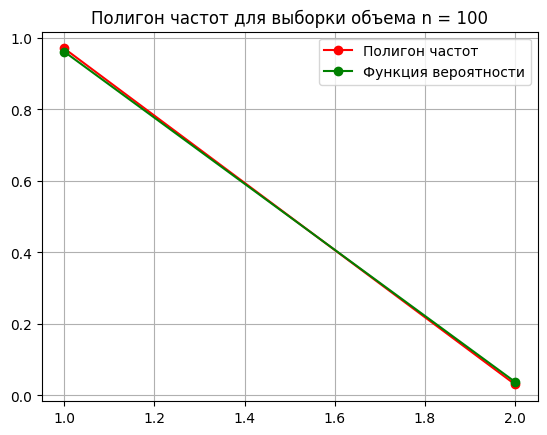

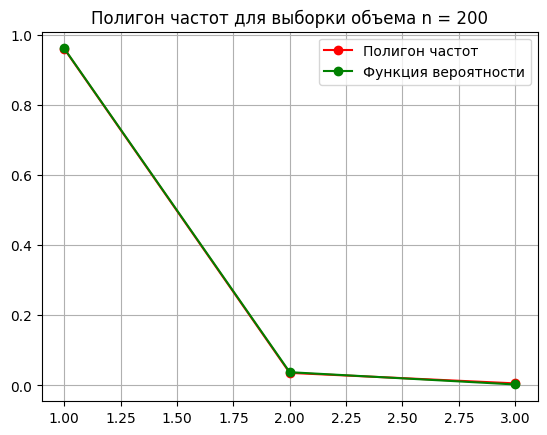

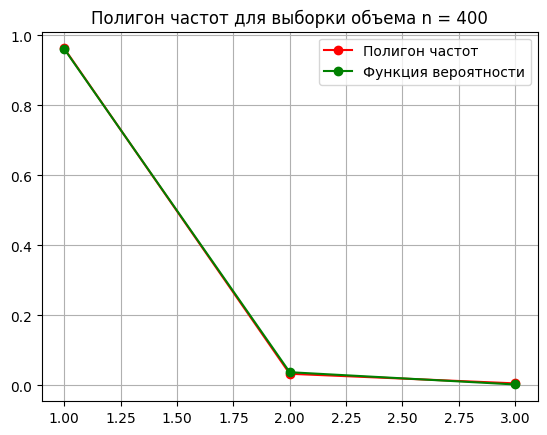

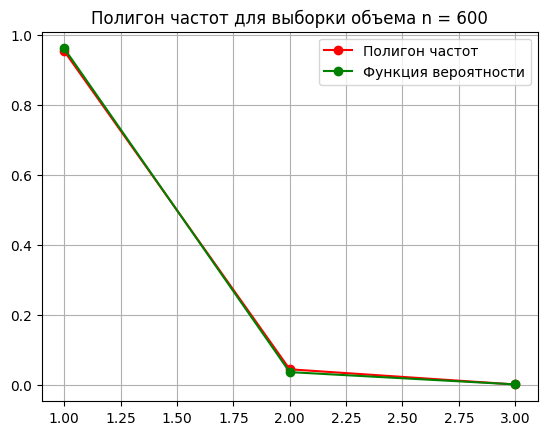

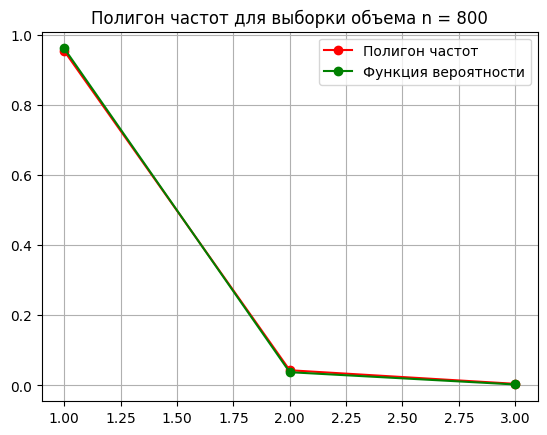

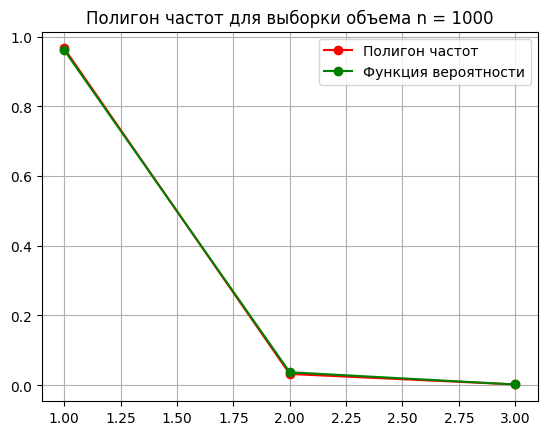

In [ ]:
for n in sizes:
  arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
  plt.plot(arr_uniq, arr_freq / n, 'r', marker='o')
  plt.plot(arr_uniq, [P(x) for x in arr_uniq], 'g', marker='o')
  plt.grid(True)
  plt.legend(['Полигон частот', 'Функция вероятности'])
  plt.title(f'Полигон частот для выборки объема n = {n}')
  plt.show()

## Вычисление выборочных моментов

In [ ]:
glist = np.array(df_log[10][4])
df_log[10][4]

In [ ]:
sample_av = glist.mean()
sample_var = np.mean((glist - sample_av)**2)
sample_var

In [ ]:
for n in sizes:
  df = np.array(df_log[n][4])
  sample_av = df.mean()
  sample_var = np.mean((df - sample_av)**2)
  print(f'n = {n}' + (4 - len(str(n))) * ' ' + f' | Выборочное среднее = {np.round(sample_av, 5)}' + (6 - len(str(sample_av))) * ' ' + f' | Выборочная дисперсия = {np.round(sample_var, 5)}')

# Доп

In [ ]:
sizes = {5, 10, 100, 200, 400, 600, 800, 1000}
dfs_t = [np.random.triangular(0, 0.6, 1, n) for n in sizes]
dfs_l = [np.random.default_rng().logseries(1/13, n) for n in sizes]

In [ ]:
for df in dfs_t:
  h = plt.hist(df, bins=200, density=True)
  plt.show()

In [ ]:
h = plt.hist(np.random.triangular(0, 0.6, 1, 100000), bins=200, density=True)
plt.show()

In [ ]:
count, bins, ignored = plt.hist(np.random.default_rng().logseries(1/13, 1000))
plt.show()